In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_df = '/content/drive/My Drive/copd.csv'


In [ ]:
import pandas as pd

data_df = pd.read_csv('/content/drive/My Drive/copd.csv')
print(data_df.shape)


(633, 17)


In [ ]:
# Display rows with non-numeric values in the specified columns
print("Non-numeric values in 'sex' column:")
print(data_df[~data_df['sex'].apply(lambda x: isinstance(x, (int, float)))])

print("\nNon-numeric values in 'age' column:")
print(data_df[~data_df['age'].apply(lambda x: isinstance(x, (int, float)))])

print("\nNon-numeric values in 'bmi' column:")
print(data_df[~data_df['bmi'].apply(lambda x: isinstance(x, (int, float)))])

print("\nNon-numeric values in 'smoke' column:")
print(data_df[~data_df['smoke'].apply(lambda x: isinstance(x, (int, float)))])


Non-numeric values in 'sex' column:
Empty DataFrame
Columns: [uid, label, sex, age, bmi, smoke, location, rs10007052, rs8192288, rs20541, rs12922394, rs2910164, rs161976, rs473892, rs159497, rs9296092, class]
Index: []

Non-numeric values in 'age' column:
Empty DataFrame
Columns: [uid, label, sex, age, bmi, smoke, location, rs10007052, rs8192288, rs20541, rs12922394, rs2910164, rs161976, rs473892, rs159497, rs9296092, class]
Index: []

Non-numeric values in 'bmi' column:
Empty DataFrame
Columns: [uid, label, sex, age, bmi, smoke, location, rs10007052, rs8192288, rs20541, rs12922394, rs2910164, rs161976, rs473892, rs159497, rs9296092, class]
Index: []

Non-numeric values in 'smoke' column:
Empty DataFrame
Columns: [uid, label, sex, age, bmi, smoke, location, rs10007052, rs8192288, rs20541, rs12922394, rs2910164, rs161976, rs473892, rs159497, rs9296092, class]
Index: []


In [ ]:
data_df = data_df.apply(pd.to_numeric, errors='coerce')  # Convert entire DataFrame to numeric, non-convertible values become NaN
data_df = data_df.dropna(subset=['sex', 'age', 'bmi', 'smoke'])  # Drop rows with NaN in key columns


<Axes: >

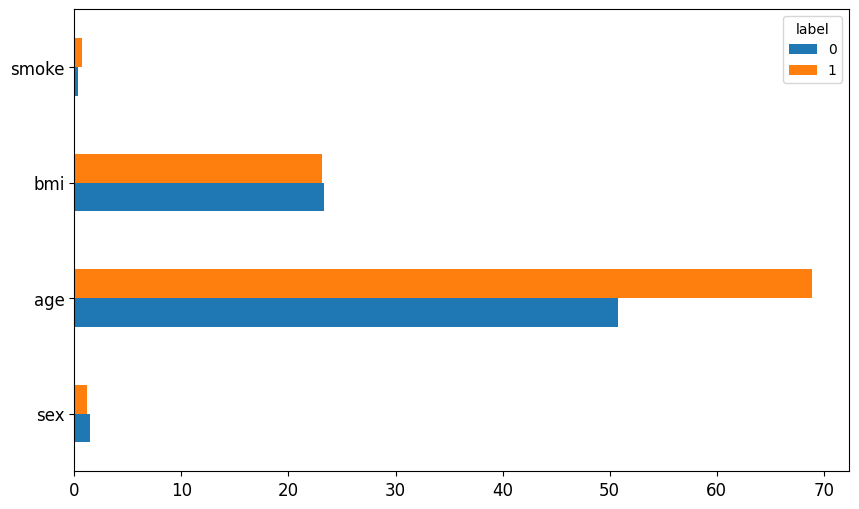

In [ ]:
grouped_df = data_df.groupby(['label']).mean()[['sex', 'age', 'bmi', 'smoke']]
grouped_df.transpose().plot.barh(figsize=(10, 6), fontsize=12)


In [ ]:
data_df['label'].value_counts()

,count
label,
1,441
0,192


In [ ]:
data_df.describe()

,uid,label,sex,age,bmi,smoke,location,rs10007052,rs8192288,rs20541,rs12922394,rs2910164,rs161976,rs473892,rs159497,rs9296092,class
count,0.0,633.000000,633.000000,633.000000,633.000000,633.000000,633.000000,624.000000,628.000000,629.000000,628.000000,629.000000,598.000000,633.000000,595.000000,620.000000,0.0
mean,NaN,0.696682,1.271722,63.417062,23.190724,0.631912,6.617678,1.391994,0.891881,0.804953,0.859815,1.406741,1.255722,1.299271,1.337422,1.185820,NaN
std,NaN,0.460055,0.445199,15.369700,3.661055,0.482667,1.523725,0.511025,0.188801,0.199016,0.184891,0.348731,0.387540,0.336951,0.374177,0.492045,NaN
min,NaN,0.000000,1.000000,21.000000,14.300000,0.000000,4.630000,1.000000,0.351293,0.448632,0.423280,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,0.000000,1.000000,55.000000,20.730000,0.000000,5.310000,1.000000,0.592700,0.669800,0.650600,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,1.000000,1.000000,66.000000,23.030000,1.000000,6.880000,1.000000,1.000000,0.669800,1.000000,1.416000,1.000000,1.473000,1.445000,1.000000,NaN
75%,NaN,1.000000,2.000000,75.000000,25.240000,1.000000,7.780000,1.671000,1.000000,1.000000,1.000000,1.416000,1.594000,1.473000,1.445000,1.000000,NaN
max,NaN,1.000000,2.000000,98.000000,43.560000,1.000000,8.720000,2.792241,1.000000,1.000000,1.000000,2.005056,2.540836,2.169729,2.088025,3.356224,NaN


In [ ]:
data_df.columns

Index(['uid', 'label', 'sex', 'age', 'bmi', 'smoke', 'location', 'rs10007052',
       'rs8192288', 'rs20541', 'rs12922394', 'rs2910164', 'rs161976',
       'rs473892', 'rs159497', 'rs9296092', 'class'],
      dtype='object')

In [ ]:
data_df.isnull().sum(0)

,0
uid,633
label,0
sex,0
age,0
bmi,0
smoke,0
location,0
rs10007052,9
rs8192288,5
rs20541,4


In [ ]:
def fillna_data(data):
    for col in range(2,len(data.columns)-1):
        data[data.columns[col]].fillna(data[data.columns[col]].mean(),inplace = True)
    return data

In [ ]:
def load_data(data):
    data = fillna_data(data)
    feature = data[['sex', 'age',"smoke", 'bmi', 'location', 'rs10007052', 'rs8192288', 'rs20541', 'rs12922394', 'rs2910164', 'rs161976', 'rs473892', 'rs159497', 'rs9296092']]
    target =  data['label']

    return feature,target

In [ ]:
from sklearn.utils import shuffle

train_df = data_df[data_df['class'] == 'train']
test_df = data_df[data_df['class'] == 'validate']

train_df = shuffle(train_df,random_state = 42)
test_df = shuffle(test_df,random_state = 42)

In [ ]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

knn = KNeighborsClassifier()
svm = SVC(probability=True,random_state=42)
lr = LogisticRegression(random_state=42,penalty='l1',C=10,max_iter=50,intercept_scaling=10)
tree = DecisionTreeClassifier()
nn = MLPClassifier(hidden_layer_sizes=(4,4,4),random_state = 42)

from collections import Counter

counter = Counter(data_df['label'])
neg, pos = counter[0], counter[1]
pos_weight = neg / pos

xgboost = xgb.XGBClassifier(
    scale_pos_weight=pos_weight,
    random_state=42,
    learning_rate=0.05,
    n_estimators=5000,
    max_depth=500,
    reg_alpha=0.25,
    subsample=1,
    eval_metric="auc"
)

classifier_lst = [knn, lr, svm, tree, nn,xgboost]
classifier_lst_name = ['KNN', 'LR', 'SVM', 'DT', 'MLP','XGboost']

In [ ]:
from sklearn.metrics import confusion_matrix,matthews_corrcoef,accuracy_score,\
                            f1_score,recall_score,precision_score,roc_auc_score,roc_curve,auc

def make_baseline(train_df, test_df ,classifier):
    X_train,y_train = load_data(train_df)
    X_test,y_test = load_data(test_df)

    classifier.fit(X_train,y_train)
    pred_proba = classifier.predict_proba(X_test)
    pred = classifier.predict(X_test)

    acc = accuracy_score(y_test,pred)
    precisions = precision_score(y_test,pred)
    recalls = recall_score(y_test,pred)
    f1s = f1_score(y_test,pred)
    mcc = matthews_corrcoef(y_test,pred)

    aucs1 = roc_auc_score(y_test,pred)
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    aucs = auc(fpr, tpr)

    return acc, precisions, recalls, f1s, aucs, mcc

In [ ]:
precisions_mean_lst =[]
recalls_mean_lst =[]
f1s_mean_lst,auc_mean_lst,acc_mean_lst = [],[],[]
mcc_mean_lst =[]

for i in classifier_lst:
    acc, precisions, recalls, f1s, aucs, mcc = make_baseline(train_df, test_df, i)

    acc_mean_lst.append(acc)
    precisions_mean_lst.append(precisions)
    recalls_mean_lst.append(recalls)
    f1s_mean_lst.append(f1s)
    auc_mean_lst.append(aucs)

    mcc_mean_lst.append(mcc)

all_para = {"accuracy":acc_mean_lst,"precision":precisions_mean_lst,
            "recall":recalls_mean_lst,"f1score":f1s_mean_lst,
            "mcc_score":mcc_mean_lst,"aucscore":auc_mean_lst}
result = pd.DataFrame(all_para,index = ['KNN', 'LR', 'SVM', 'DT', 'MLP','XGboost'])
print(result)

<ipython-input-19-1f531d2aea96>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[data.columns[col]].fillna(data[data.columns[col]].mean(),inplace = True)
<ipython-input-19-1f531d2aea96>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

         accuracy  precision    recall   f1score  mcc_score  aucscore
KNN      0.850394   0.850000  0.955056  0.899471   0.627105  0.829095
LR       0.834646   0.869565  0.898876  0.883978   0.597575  0.886753
SVM      0.779528   0.769912  0.977528  0.861386   0.428866  0.824660
DT       0.818898   0.912500  0.820225  0.863905   0.603198  0.818007
MLP      0.818898   0.823529  0.943820  0.879581   0.541427  0.828208
XGboost  0.874016   0.910112  0.910112  0.910112   0.699586  0.940272


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from numpy import interp
import warnings
warnings.filterwarnings("ignore")

def plot_ROC(model, model_name, color, X, y, X_test, y_test):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    probas_ = model.fit(X, y).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color=color,
             label=r'{} ROC curve (AUC = %0.2f)'.format(model_name) % (mean_auc),
             lw=2, alpha=0.8)

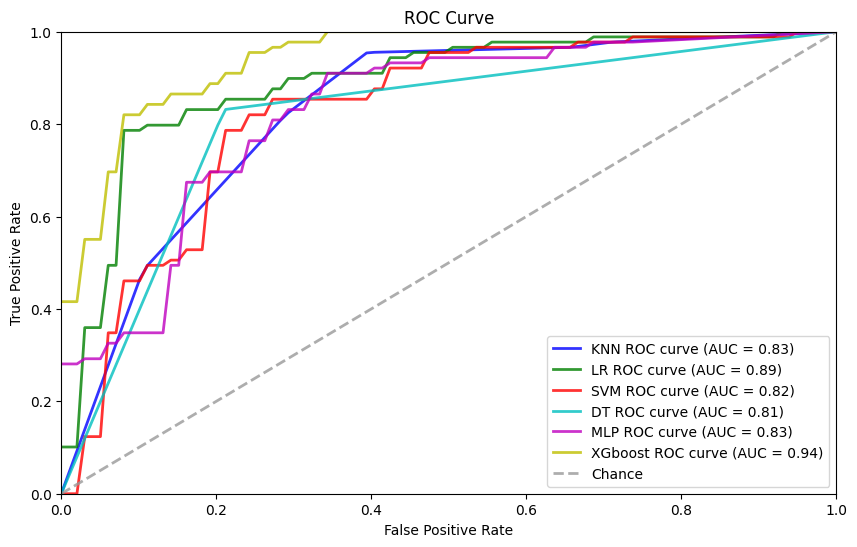

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from numpy import interp
import warnings
warnings.filterwarnings("ignore")

def plot_ROC(model, model_name, color, X, y, X_test, y_test):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    probas_ = model.fit(X, y).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color=color,
             label=r'{} ROC curve (AUC = %0.2f)'.format(model_name) % (mean_auc),
             lw=2, alpha=0.8)
feature, target = load_data(train_df)
X, y = np.array(feature), np.array(target)

X_test, y_test = load_data(test_df)
X_test, y_test = np.array(X_test), np.array(y_test)

color_list = ['b', 'g', 'r', 'c', 'm', 'y']
fig = plt.figure(figsize=(10, 6))
for model, model_name, color in zip(classifier_lst, classifier_lst_name, color_list):
    plot_ROC(model, model_name, color, X, y, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color=(0.6, 0.6, 0.6), label='Chance', alpha=0.8)
plt.xlim([-0.0, 1.0])
plt.ylim([-0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


weight: 
 {'sex': 338.0, 'age': 1769.0, 'smoke': 391.0, 'bmi': 2736.0, 'location': 866.0, 'rs10007052': 426.0, 'rs8192288': 238.0, 'rs20541': 674.0, 'rs12922394': 378.0, 'rs2910164': 326.0, 'rs161976': 544.0, 'rs473892': 472.0, 'rs159497': 619.0, 'rs9296092': 95.0} 

gain: 
 {'sex': 0.7231709361076355, 'age': 0.7666890025138855, 'smoke': 0.35543474555015564, 'bmi': 0.15972542762756348, 'location': 1.0663261413574219, 'rs10007052': 0.12473100423812866, 'rs8192288': 0.21594718098640442, 'rs20541': 0.14130137860774994, 'rs12922394': 0.16309577226638794, 'rs2910164': 0.14032286405563354, 'rs161976': 0.1307028830051422, 'rs473892': 0.11628216505050659, 'rs159497': 0.13225768506526947, 'rs9296092': 0.381759911775589} 

cover: 
 {'sex': 13.51961612701416, 'age': 10.026557922363281, 'smoke': 7.539085388183594, 'bmi': 6.822288513183594, 'location': 12.830052375793457, 'rs10007052': 4.845490455627441, 'rs8192288': 6.750566005706787, 'rs20541': 5.049271106719971, 'rs12922394': 4.110085487365723, 

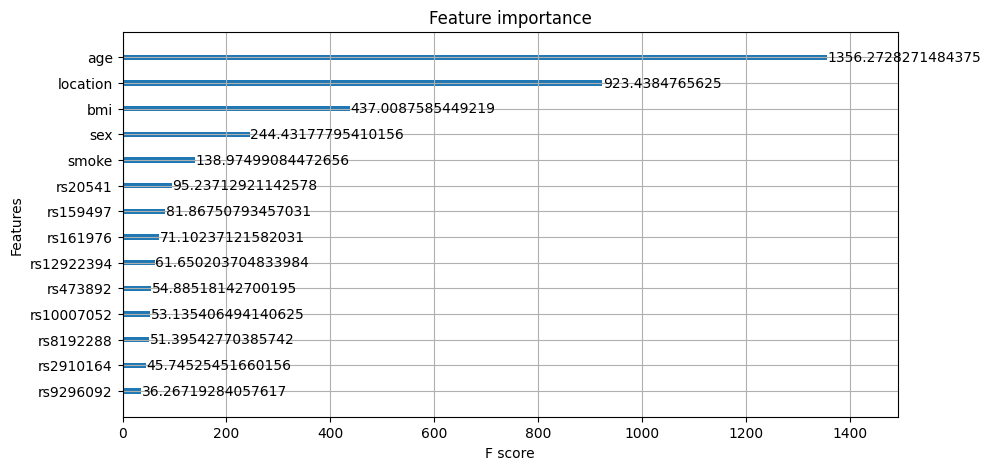

In [ ]:
from xgboost import plot_importance

model = xgboost

train_x,train_y = load_data(train_df)

model.fit(train_x,train_y)

fig = plot_importance(model,importance_type="total_gain",show_values=True).get_figure()

fig.set_size_inches(10,5)
fig.show()

for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: \n' % importance_type, model.get_booster().get_score(importance_type=importance_type),"\n")